In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
dfx=pd.read_csv('Train_Air.csv')

x=dfx.values
print(x.shape)
print(x[:,-1])

(1600, 6)
[ -82.15466656  -48.89796018   77.2703707  ... -107.510508    -47.34155781
 -115.939003  ]


In [19]:
y=x[:,-1]
print(y.shape)
print(x[:,-2])

(1600,)
[ 0.52566183  0.59799685 -0.18736416 ...  0.44251965  0.73633394
  1.4595758 ]


In [20]:
print(y)
x=x[:,:-1]



[ -82.15466656  -48.89796018   77.2703707  ... -107.510508    -47.34155781
 -115.939003  ]


In [21]:
print(x[:,-1])

[ 0.52566183  0.59799685 -0.18736416 ...  0.44251965  0.73633394
  1.4595758 ]


In [22]:
print(x.shape)
print(y.shape)

(1600, 5)
(1600,)


In [28]:
dfx.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [29]:
u=np.mean(x,axis=0) #5 means one for each feature
std=np.std(x,axis=0) #5 stds one for each feature
print(u.shape,std.shape)

(5,) (5,)


In [30]:
X=(x-u)/std

In [31]:
pd.DataFrame(X[:5,:]).head()

,0,1,2,3,4
0,0.290165,-0.898712,-0.372381,0.441771,0.525024
1,-0.842705,-0.158229,-0.723656,-0.994642,0.598960
2,0.233004,0.157070,-0.102094,0.729947,-0.203782
3,0.171708,0.167210,-0.530576,-0.078377,-1.333037
4,-1.702188,0.558336,-2.723087,-0.633625,1.259339


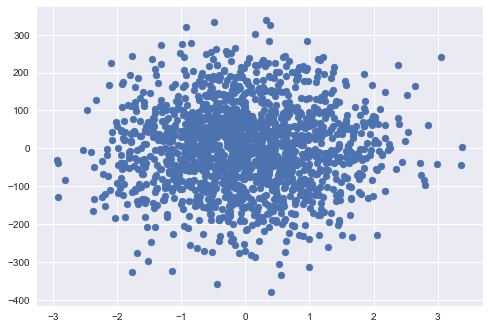

In [33]:
plt.style.use('seaborn')

import matplotlib.pyplot as plt
plt.scatter(X[:,4],y)

In [35]:
X.shape,y.shape

((1600, 5), (1600,))

In [36]:
ones=np.ones((X.shape[0],1))
X= np.hstack((ones,X)) #updation of older matrix by stacking in  a horizontal fashion
print(X.shape)


(1600, 6)


In [37]:
X[:4,:4]

array([[ 1.        ,  0.29016495, -0.89871183, -0.37238147],
       [ 1.        , -0.84270473, -0.15822922, -0.72365639],
       [ 1.        ,  0.23300381,  0.15706968, -0.10209444],
       [ 1.        ,  0.17170821,  0.16721032, -0.53057575]])

In [38]:
def hypothesis(x,theta):
    y_=0.0 #(y hat)
    n=x.shape[0]
    for i in range(n):
        y_+=(theta[i]*x[i])
    return y_

def error(X,y,theta):
    e=0.0
    m=X.shape[0]
    
    for i in range(m):
        y_=hypothesis(X[i],theta)
        e+=(y[i]-y_)**2
        
    return e/m
    

def gradient(X,y,theta):
    m,n=X.shape
    
    grad= np.zeros((n,)) #no of features
    
    #for all values of j
    for j in range(n):
        #sum over all examples
        for i in range(m):
            y_=hypothesis(X[i],theta)
            grad[j]+=(y_-y[i])*X[i][j]
            
    #Out of loops
    return grad/m
        
    

def gradient_descent(X,y,learning_rate=0.1,max_epochs=300): #epochs number of iterations
    m,n= X.shape
    theta=np.zeros((n,))
    error_list=[]
    
    for i in range(max_epochs):
        e=error(X,y,theta)
        error_list.append(e)
        
        grad=gradient(X,y,theta)
        for j in range(n):
            theta[j]=theta[j]-learning_rate*grad[j]
            
            
    return theta,error_list

In [40]:
theta,error_list=gradient_descent(X,y)


In [62]:
dfx=pd.read_csv('Test_Air.csv')

T=dfx.values

y_=[]

ones=np.ones((T.shape[0],1))
T= np.hstack((ones,T)) #updation of older matrix by stacking in  a horizontal fashion

m=T.shape[0]

for i in range(m):
    pred=hypothesis(T[i],theta)
    y_.append(pred)
    
y_=np.array(y_)

In [63]:
print(y_[:10], y[:10])
print(y_.shape)

[ 112.15168365  115.87976765  -25.87626165  -47.63583978 -102.51798163
  -50.28931937  -81.36835985   20.93713794  172.90067199  170.88408457] [ -82.15466656  -48.89796018   77.2703707    -2.98858081  -37.59672212
 -122.4052632     1.41374096  -13.30654265  -25.754698    -57.07775437]
(400,)


In [64]:
print(T.shape)

(400, 6)


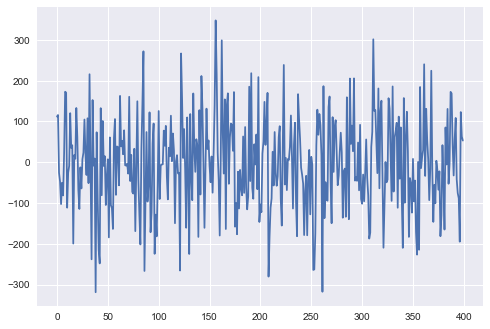

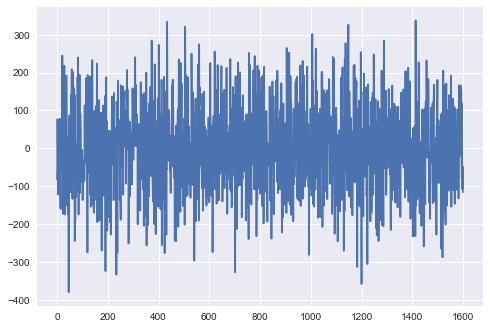

In [65]:
plt.plot(y_)
plt.show()
plt.plot(y)

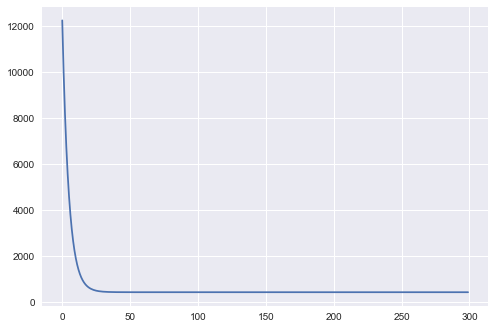

In [66]:
plt.plot(error_list)
plt.show()

In [69]:
import csv
with open('results_air2.csv','w',newline='') as f:
    fwriter=csv.writer(f)
    fwriter.writerow(['Id','target'])
    for i in range(T.shape[0]):
        fwriter.writerow([i, y_[i]])